In [2]:
import pandas as pd
df=pd.read_csv("Iris.csv")
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [3]:
df.shape

(150, 6)

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [19]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


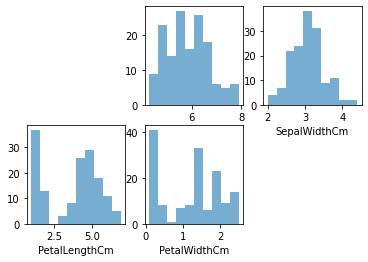

In [35]:
import matplotlib.pyplot as plt
df=df.drop(columns=['Id'],errors='ignore')
x=df.drop(columns=['Species'])
for i,col in enumerate(x,1):
    plt.subplot(2,3,i+1)
    plt.hist(df[col],bins=10,alpha=0.6)
    plt.xlabel(col)
plt.show()

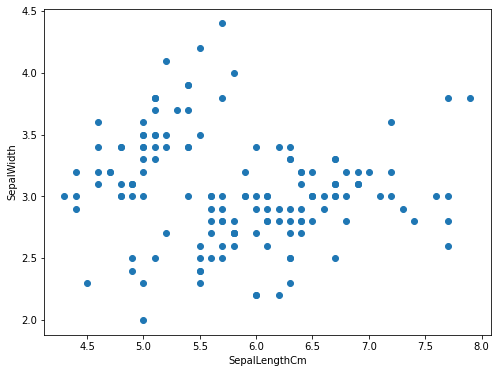

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(data=df,x='SepalLengthCm',y='SepalWidthCm')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidth')
plt.show()

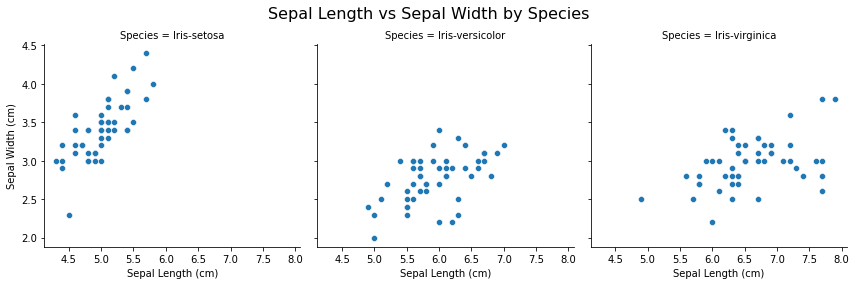

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('/mnt/data/Iris.csv')
# Create a FacetGrid with one scatter plot per species

g = sns.FacetGrid(df, col="Species", height=4)
g.map_dataframe(sns.scatterplot, x="SepalLengthCm", y="SepalWidthCm")
g.set_axis_labels("Sepal Length (cm)", "Sepal Width (cm)")
g.fig.suptitle("Sepal Length vs Sepal Width by Species", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

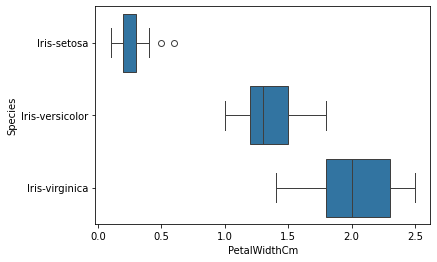

In [41]:
sns.boxplot(data=df,x='PetalWidthCm',y='Species')
plt.show()

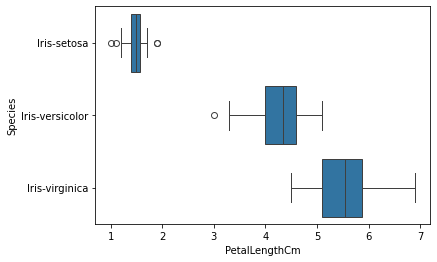

In [43]:
sns.boxplot(data=df,x='PetalLengthCm',y='Species')
plt.show()

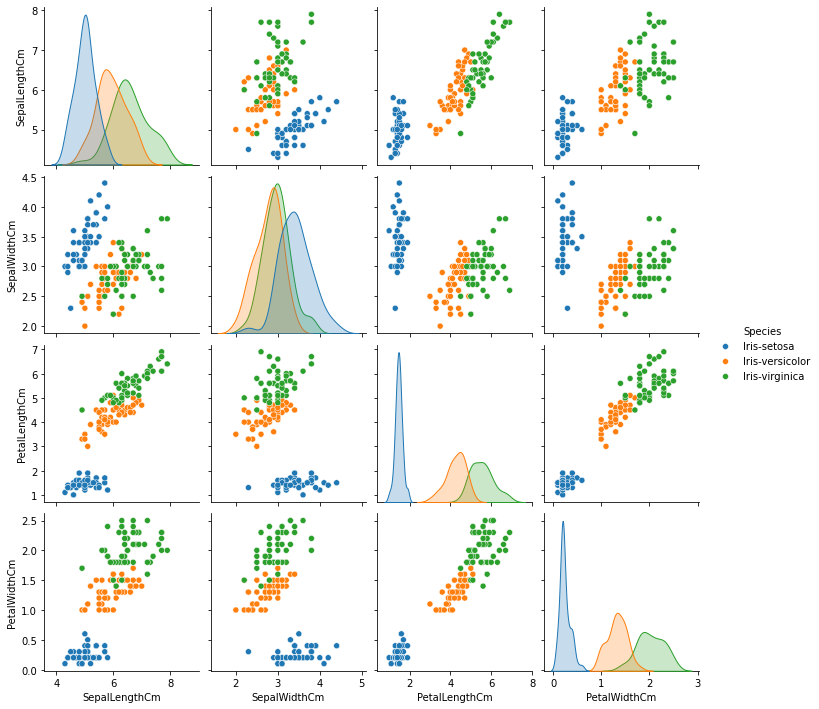

In [46]:
sns.pairplot(df,hue='Species')
plt.show()

In [47]:
correlation=df['SepalLengthCm'].corr(df['SepalWidthCm'])
print(correlation)

-0.10936924995064937


In [48]:
x=df.drop(columns=['Species'])
y=df['Species']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

In [57]:
cr=classification_report(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(cr,accuracy)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45
 0.9777777777777777


In [64]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

# Initialize model with valid C > 0
model = SVC(kernel='rbf', C=1, gamma='scale')  # Changed C from 0 to 1

# Define KFold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, x, y, cv=kf)

# Print the results
print(f"k-fold validation scores: {scores}")
print(f"Average accuracy: {scores.mean():.2f}")

k-fold validation scores: [1.         1.         0.93333333 0.93333333 0.96666667]
Average accuracy: 0.97
